Importing libraries

In [680]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score,roc_auc_score


Loading the dataset

In [681]:
iris = pd.read_csv('iris_dataset_missing.csv')
iris.shape


(105, 5)

In [682]:
pd.set_option("display.max_rows", None)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor
5,6.707485,3.093846,5.048317,2.373470,Iris-virginica
6,4.811740,3.037915,1.494268,-0.042428,Iris-setosa
7,5.205868,NaN,1.675654,0.112269,Iris-setosa
8,4.436832,2.867772,1.428415,0.385249,Iris-setosa
9,6.847619,3.132270,5.878479,2.166297,Iris-virginica


In [683]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


In [684]:
iris.groupby('species').size()

species
Iris-setosa        35
Iris-versicolor    35
Iris-virginica     35
dtype: int64

Splitting into X and Y for features and target separation

In [685]:
X=iris.iloc[:, :-1].values
X

array([[ 5.04507044,  2.5082034 ,  3.0180239 ,  1.16492428],
       [ 6.32551652,  2.11548119,  4.54205199,  1.41365089],
       [ 5.25749677,  3.81430344,  1.47066017,  0.39534827],
       [ 6.67516836,  3.20170027,  5.78546113,  2.36276405],
       [ 5.59523675,  2.6781663 ,  4.07775008,  1.36926607],
       [ 6.70748489,  3.09384635,  5.0483171 ,  2.37346951],
       [ 4.8117405 ,  3.03791458,  1.49426801, -0.04242758],
       [ 5.20586786,         nan,  1.67565431,  0.11226891],
       [ 4.4368316 ,  2.86777198,  1.42841502,  0.38524937],
       [ 6.84761927,  3.13226989,  5.87847874,  2.16629653],
       [ 6.47896147,  3.14986312,  5.07823902,  1.78511144],
       [ 4.99407146,  2.98172398,  1.27432343,  0.33349432],
       [ 5.13123932,  3.06816456,  1.47404981,  0.15681703],
       [ 6.03085452,  3.07083885,  4.63030399,  1.49192419],
       [ 5.60371932,  2.38349341,  3.83776335,  1.05384559],
       [ 7.3716885 ,  3.29946214,  6.23037794,  1.83792535],
       [ 5.10853422,  3.

In [686]:
y=iris.iloc[:, -1].values
y

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-v

Filling the missing values with mean imputation as per data cleaning step

In [722]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:4])
X[:, 1:4] = imputer.transform(X[:, 1:4])


In [688]:
X

array([[ 5.04507044,  2.5082034 ,  3.0180239 ,  1.16492428],
       [ 6.32551652,  2.11548119,  4.54205199,  1.41365089],
       [ 5.25749677,  3.81430344,  1.47066017,  0.39534827],
       [ 6.67516836,  3.20170027,  5.78546113,  2.36276405],
       [ 5.59523675,  2.6781663 ,  4.07775008,  1.36926607],
       [ 6.70748489,  3.09384635,  5.0483171 ,  2.37346951],
       [ 4.8117405 ,  3.03791458,  1.49426801, -0.04242758],
       [ 5.20586786,  3.05908295,  1.67565431,  0.11226891],
       [ 4.4368316 ,  2.86777198,  1.42841502,  0.38524937],
       [ 6.84761927,  3.13226989,  5.87847874,  2.16629653],
       [ 6.47896147,  3.14986312,  5.07823902,  1.78511144],
       [ 4.99407146,  2.98172398,  1.27432343,  0.33349432],
       [ 5.13123932,  3.06816456,  1.47404981,  0.15681703],
       [ 6.03085452,  3.07083885,  4.63030399,  1.49192419],
       [ 5.60371932,  2.38349341,  3.83776335,  1.05384559],
       [ 7.3716885 ,  3.29946214,  6.23037794,  1.83792535],
       [ 5.10853422,  3.

Splitting into training set(80%) and testing set(20%)

In [689]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 98)

In [690]:
X_train

array([[ 5.73610432,  2.98323096,  4.19279079,  1.21006831],
       [ 7.6477493 ,  3.13145164,  6.11843453,  2.60312252],
       [ 6.63392158,  2.8655798 ,  5.46455437,  2.11989468],
       [ 5.60306503,  2.4723375 ,  4.95569381,  2.05256756],
       [ 6.64399779,  3.23968219,  4.46454214,  1.40035524],
       [ 6.70748489,  3.09384635,  5.0483171 ,  2.37346951],
       [ 6.89751339,  3.1817443 ,  5.58049175,  1.98765351],
       [ 6.03085452,  3.07083885,  4.63030399,  1.49192419],
       [ 6.11791184,  2.76868774,  4.75179523,  1.75892696],
       [ 7.54096074,  3.79708698,  6.61714146,  2.05131712],
       [ 6.47896147,  3.14986312,  5.07823902,  1.78511144],
       [ 6.34034381,  3.05908295,  4.302989  ,  1.33179723],
       [ 5.69540534,  2.61809657,  5.09885986,  1.96231998],
       [ 5.59330337,  2.97260443,  3.70702075,  1.4754228 ],
       [ 5.91182249,  2.56051205,  3.81236975,  1.7665126 ],
       [ 6.49410066,  2.70352765,  4.58462925,  1.58132242],
       [ 5.15243509,  4.

In [691]:
X_test

array([[ 4.86020972,  3.0711281 ,  1.48750393, -0.07220259],
       [ 5.60371932,  2.38349341,  3.83776335,  1.05384559],
       [ 6.26558982,  3.05908295,  4.701306  ,  1.29018703],
       [ 7.28325532,  3.04062615,  5.56698221,  1.68122224],
       [ 4.51153791,  2.24283698,  1.25385019,  0.16585127],
       [ 4.99407146,  2.98172398,  1.27432343,  0.33349432],
       [ 5.04510834,  1.94600995,  3.58159106,  0.8916314 ],
       [ 7.67520968,  3.00228496,  6.62551753,  2.07627571],
       [ 5.47206412,  3.46715944,  1.36586519,  0.34366882],
       [ 5.10853422,  3.2358805 ,  1.50645649,  0.35442256],
       [ 5.10892193,  3.64254618,  1.28959257,  0.21230512],
       [ 4.49634245,  3.09826964,  3.81236975,  0.24285276],
       [ 6.06011642,  2.94393874,  3.93366133,  1.17624641],
       [ 5.42188983,  3.93455269,  1.71222874,  0.22536788],
       [ 7.04535078,  3.04141003,  5.09442706,  1.51377725],
       [ 4.73607264,  3.48224224,  1.91947488,  0.2621367 ],
       [ 5.59523675,  2.

In [692]:
y_train

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iri

In [693]:
y_test

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

Feature Scaling as per data cleaning step

In [694]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [695]:
X_train=pd.DataFrame(X_train)
X_train

,0,1,2,3
0,-0.254740,-0.198928,0.107031,-0.134623
1,2.074909,0.138302,1.259981,1.671722
2,0.839396,-0.466606,0.868480,1.045130
3,-0.416870,-1.361306,0.563808,0.957828
4,0.851675,0.384547,0.269738,0.112118
5,0.929045,0.052743,0.619265,1.373935
6,1.160625,0.252727,0.937896,0.873656
7,0.104461,0.000396,0.368986,0.230853
8,0.210554,-0.687054,0.441727,0.577071
9,1.944770,1.652746,1.558574,0.956207


In [696]:
X_test=pd.DataFrame(X_test)
X_test

,0,1,2,3
0,-1.322160,0.001055,-1.512717,-1.797318
1,-0.416073,-1.563442,-0.105536,-0.337194
2,0.390524,-0.026350,0.411497,-0.030735
3,1.630714,-0.068343,0.929807,0.476312
4,-1.747073,-1.883462,-1.652614,-1.488639
5,-1.159027,-0.202356,-1.640356,-1.271259
6,-1.096831,-2.558799,-0.258915,-0.547534
7,2.108374,-0.155576,1.563589,0.988570
8,-0.576516,0.902100,-1.585546,-1.258066
9,-1.019536,0.375897,-1.501370,-1.244122


knn with Default parameters

In [697]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#KneighborsClassifier() is set to default parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
a_scores=(accuracy_score(y_test, y_pred)*100)
print("Accuracy for default parameters is ",a_scores,"%")

Accuracy for default parameters is  95.23809523809523 %


5 fold CrossValidation for parameter tuning

In [699]:
from sklearn.model_selection import cross_val_score
k_list=[1,5,10,15,20,25,30,35]

#to store accuracy scores
accu_scores=[]

#to store variance scores
var_scores=[]


#perform 5-fold cross validation
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5,scoring= 'accuracy')
    #taking mean/variance of accuracies
    
    accu_scores.append(scores.mean()*100)
    var_scores.append(scores.std())
    

In [700]:
print(accu_scores)

[91.61764705882354, 92.79411764705883, 90.44117647058823, 90.44117647058823, 84.55882352941175, 84.55882352941175, 84.63235294117646, 85.80882352941175]


In [701]:
print(var_scores)

[0.030706783849736914, 0.04565933734194125, 0.06063390625908325, 0.060633906259083256, 0.027116307227332034, 0.05919003469852386, 0.07893374647246851, 0.06974062177281988]


Plotting accuracy vs k curve

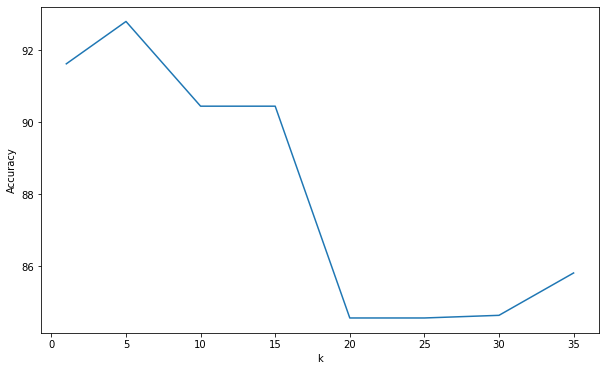

In [702]:
plt.figure(figsize=(10,6))
plt.plot(k_list, accu_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

Plotting Variance vs K curve

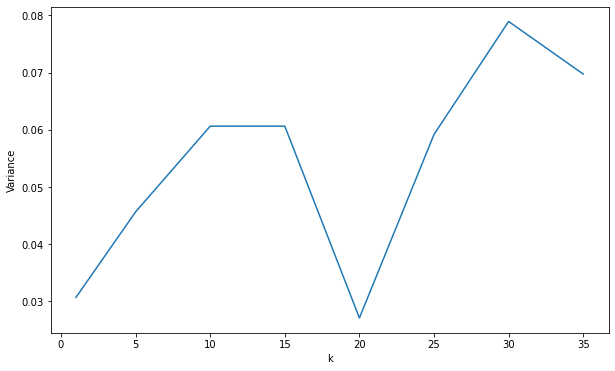

In [703]:
plt.figure(figsize=(10,6))
plt.plot(k_list, var_scores)
plt.xlabel('k')
plt.ylabel('Variance')
plt.show()

From the plots, best K value =5,fit model on training set and predict on test set

In [704]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [705]:
y_pred_prob=knn.predict_proba(X_test)

Performance Analysis

In [706]:
con_mat=confusion_matrix(y_test,y_pred)
con_mat

array([[12,  0,  0],
       [ 0,  6,  0],
       [ 0,  1,  2]], dtype=int64)

In [707]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.67      0.80         3

       accuracy                           0.95        21
      macro avg       0.95      0.89      0.91        21
   weighted avg       0.96      0.95      0.95        21



Printing the Accuracy,F1Score and AUC 

In [708]:
print('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print('F1 Score :', f1_score(y_test, y_pred,average='weighted')) 
print('AUC : ', roc_auc_score(y_test, y_pred_prob,multi_class='ovr'))

Accuracy Score : 0.9523809523809523
F1 Score : 0.9494505494505494
AUC :  1.0


Weighted KNN

Uniform-Manhattan

In [709]:
#Modifying sklearn KNeighborsClassifier's weights,p and metric parameters
#p=1 -> Manhattan
#p=2 -> Euclidean
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform',p=1,metric='minkowski')
scores=cross_val_score(knn,X_train,y_train,cv=5,scoring= 'accuracy')
scores.mean()*100

92.79411764705883

Unifrom-Euclidean

In [710]:
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform',p=2,metric='minkowski')
scores=cross_val_score(knn,X_train,y_train,cv=5,scoring= 'accuracy')
scores.mean()*100

92.79411764705883

Distance-Manhattan

In [711]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance',p=1,metric='minkowski')
scores=cross_val_score(knn,X_train,y_train,cv=5,scoring= 'accuracy')
scores.mean()*100

96.32352941176471

Distance-Euclidean

In [712]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance',p=2,metric='minkowski')
scores=cross_val_score(knn,X_train,y_train,cv=5,scoring= 'accuracy')
scores.mean()*100

93.97058823529413

Experimenting with algorithm selection parameter with best k,weights and p selected

Ball Tree

In [713]:
%%time
knn=KNeighborsClassifier(n_neighbors=5,weights='distance',p=1,algorithm='ball_tree')
bt_scores=cross_val_score(knn,X_train,y_train,cv=5,scoring= 'accuracy')
bt_scores.mean()*100

Wall time: 33.9 ms


96.32352941176471

KD Tree

In [714]:
%%time
knn=KNeighborsClassifier(n_neighbors=5,weights='distance',p=1,algorithm='kd_tree')
kd_scores=cross_val_score(knn,X_train,y_train,cv=5,scoring= 'accuracy')
kd_scores.mean()*100

Wall time: 40.9 ms


96.32352941176471

Brute

In [715]:
%%time
knn=KNeighborsClassifier(n_neighbors=5,algorithm='brute',weights='distance',p=1)
b_scores=cross_val_score(knn,X_train,y_train,cv=5,scoring= 'accuracy')
b_scores.mean()*100

Wall time: 30.9 ms


96.32352941176471

Implementation on test set after all improvements

In [716]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance',p=1,metric='minkowski',algorithm='ball_tree')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [717]:
y_pred_prob=knn.predict_proba(X_test)

In [718]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00         3

       accuracy                           1.00        21
      macro avg       1.00      1.00      1.00        21
   weighted avg       1.00      1.00      1.00        21



In [719]:
print('Accuracy Score :',accuracy_score(y_test, y_pred)*100) 
print('F1 Score :', f1_score(y_test, y_pred,average='weighted')) 
print('AUC : ', roc_auc_score(y_test, y_pred_prob,multi_class='ovr'))

Accuracy Score : 100.0
F1 Score : 1.0
AUC :  1.0


Hyperparameter tuning using GridSearchCV to select the best algorithm

In [720]:
from sklearn.model_selection import GridSearchCV

grid_params={'algorithm':[ 'ball_tree', 'kd_tree', 'brute']}

gs=GridSearchCV(KNeighborsClassifier(),grid_params)
gs_results=gs.fit(X_train,y_train)

In [721]:
gs_results.best_params_

{'algorithm': 'ball_tree'}